In [5]:
import numpy as np
import matplotlib.pyplot as plt

#This part is just a straight up function definition. 

def normal_density(mean, variance, x):
    """Compute the normal density function for a given x, mean, and variance."""
    exponent = -((x - mean) ** 2) / (2 * variance)
    return (1 / (np.sqrt(2 * np.pi*variance))) * np.exp(exponent)



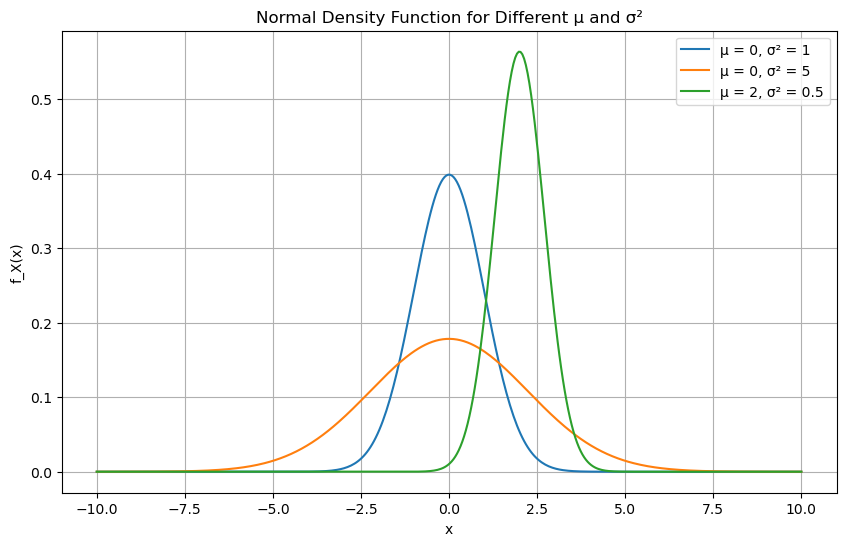

In [6]:
"""
This code plots several different density functions on the same plot, which is fairly fancy. 
If you or the people you are grading didn't do that, it's ok. I just wanted you to get a picture in your head
and a feel for plotting. As long as there are some bell shaped plots, full marks.
"""

x_values = np.linspace(-10, 10, 400)
settings = [(0, 1), (0, 5), (2, 0.5)]

plt.figure(figsize=(10, 6))
for mean, variance in settings:
    y_values = [normal_density(mean, variance, x) for x in x_values]
    plt.plot(x_values, y_values, label=f"μ = {mean}, σ² = {variance}")

plt.title("Normal Density Function for Different μ and σ²")
plt.xlabel("x")
plt.ylabel("f_X(x)")
plt.legend()
plt.grid(True)
plt.show()



In [7]:
def integration(mean, variance, a, b):
    """Numerically integrate the normal density function between a and b."""
    num_points = 100000  # Number of points for numerical integration
    x_values = np.linspace(a, b, num_points)
    dx = (b - a) / num_points
    total_area = 0

    #This is the left-endpoint rule. Any type is fine
    for x in x_values:
        total_area += normal_density(mean, variance, x) * dx

    return total_area



In [8]:
# Example usage
mean_height = 171  # mean height in cm
variance_height = 7.1 ** 2  # variance in cm^2
probability = integration(mean_height, variance_height, 162, 190)
print(f"Probability: {probability}")

#The answer you get should be very close to 90%


Probability: 0.8938006880436427


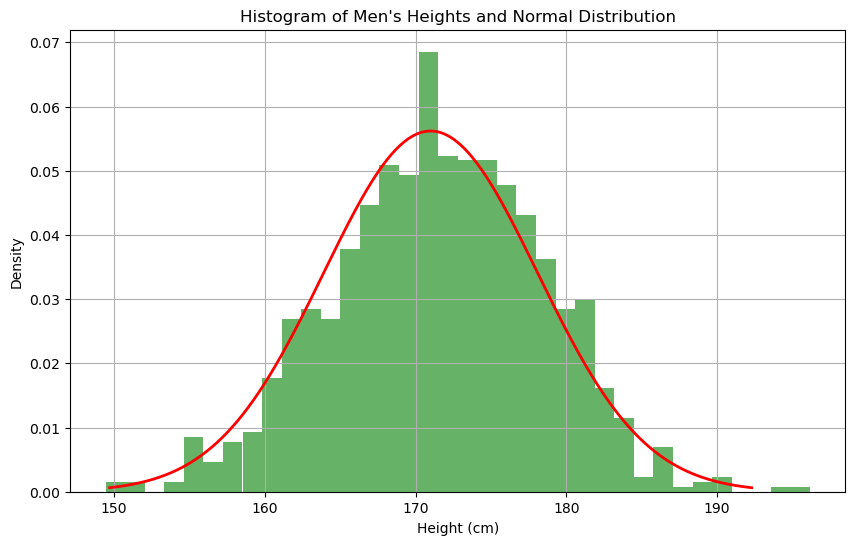

In [26]:
# Numerically sampling the distribution for men's height and plotting a histogram

# This is a little extra for your own information. 

mean_height = 171  # Mean height in cm
std_dev_height = 7.1  # Standard deviation in cm (square root of variance)

# Sampling the distribution
sample_size = 1000  # Number of samples


#Here, we can use python to sample a particular distribution. 
samples = np.random.normal(mean_height, std_dev_height, sample_size)


# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=int(np.floor(np.sqrt(sample_size)))+5, density=True, alpha=0.6, color='g')

# Plotting the actual normal distribution for comparison
x = np.linspace(mean_height - 3*std_dev_height, mean_height + 3*std_dev_height, 1000)
y = normal_density(mean_height, std_dev_height**2, x)
plt.plot(x, y, 'r', linewidth=2)

"""
Notice that the distribution function is almost exactly approximated by the histogram. 

What happens if you change the number of samples? 

"""

plt.title("Histogram of Men's Heights and Normal Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


4) Expected Value:
   First, let's just compute the expected value of our function alone and see if we get what we might expect from the picture: 

In [3]:
#Let's just adjust the code we wrote above: 

def expected_value_integration(mean, variance, a, b):
    """Numerically integrate the normal density function between a and b."""
    num_points = 100000  # Number of points for numerical integration
    x_values = np.linspace(a, b, num_points)
    dx = (b - a) / num_points
    total_area = 0

    #This is the left-endpoint rule. Any type is fine
    for x in x_values:
        total_area += x*normal_density(mean, variance, x) * dx
        # NOTE the extra x in the integrand since we integrate xf(x).
    return total_area



In [13]:
#To compute expected value, we need to integrate from -infty to infty
#How can we approximate this? 
#we can try to just integrate from a really big negative number to a 
#really big positive number!

expected_value_integration(171,7.1**2,-100000, 100000)

170.9982900000138

Your answer should be very close to the the "mean" of the distribution, which is right at the centre! One physical interpretation of expected value is that it is the ``centre of mass'' of the distribution. That is, where would the graph of the distribution balance if you were to try to balance it on a pivot?


Now, let's compute the expected value of the dosage, 

In [14]:
def expected_dosage_integration(mean, variance, a, b):
    """Numerically integrate the normal density function between a and b."""
    num_points = 100000  # Number of points for numerical integration
    x_values = np.linspace(a, b, num_points)
    dx = (b - a) / num_points
    total_area = 0

    #This is the left-endpoint rule. Any type is fine
    for x in x_values:
        total_area += (2.83*x**2)*normal_density(mean, variance, x) * dx
        # NOTE the change in the integrand since we integrate D(x)f(x).
    return total_area

expected_dosage_integration(171,7.1**2,-100000, 100000)

82893.86135310396

Your answer should be somewhere near 83000